In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
paths_to_performances = [
    {
        "hitl_iteration": 2,
        "cv_iteration": 0,
        "path": Path.cwd() / 'resources' / 'HITL-iteration-2' / 'model-selection' / 'validation_performance_cv_fold_1_MedSAM-ViT-B-20240729-2048.json'
    },
    {
        "hitl_iteration": 2,
        "cv_iteration": 1,
        "path": Path.cwd() / 'resources' / 'HITL-iteration-2' / 'model-selection' / 'validation_performance_cv_fold_2_MedSAM-ViT-B-20240730-0847.json'
    },
    {
        "hitl_iteration": 2,
        "cv_iteration": 2,
        "path": Path.cwd() / 'resources' / 'HITL-iteration-2' / 'model-selection' / 'validation_performance_cv_fold_3_MedSAM-ViT-B-20240730-1505.json'
    },
    {
        "hitl_iteration": 2,
        "cv_iteration": 3,
        "path": Path.cwd() / 'resources' / 'HITL-iteration-2' / 'model-selection' / 'validation_performance_cv_fold_4_MedSAM-ViT-B-20240730-2036.json'
    },
    {
        "hitl_iteration": 2,
        "cv_iteration": 4,
        "path": Path.cwd() / 'resources' / 'HITL-iteration-2' / 'model-selection' / 'validation_performance_cv_fold_5_MedSAM-ViT-B-20240731-0300.json'
    },
    {
        "hitl_iteration": 2,
        "cv_iteration": 5,
        "path": Path.cwd() / 'resources' / 'HITL-iteration-2' / 'model-selection' / 'validation_performance_cv_fold_6_MedSAM-ViT-B-20240731-0835.json'
    },
    {
        "hitl_iteration": 2,
        "cv_iteration": 6,
        "path": Path.cwd() / 'resources' / 'HITL-iteration-2' / 'model-selection' / 'validation_performance_cv_fold_7_MedSAM-ViT-B-20240731-1435.json'
    },
    {
        "hitl_iteration": 2,
        "cv_iteration": 7,
        "path": Path.cwd() / 'resources' / 'HITL-iteration-2' / 'model-selection' / 'validation_performance_cv_fold_8_MedSAM-ViT-B-20240731-2035.json'
    }
]
paths_to_splits = [
    {
        "hitl_iteration": 2,
        "path": Path.cwd() / 'resources' / 'HITL-iteration-2' / 'model-selection' / 'splits.csv'
    }
]

In [3]:
pd.set_option('display.max_colwidth', None)
#pd.reset_option('display.max_colwidth')

# Obtención de modelos: Validación Cruzada

Se propone una Validación Cruzada de tipo **Leave One Patient Out (LOPO)** para seleccionar el mejor modelo después de cada época de entrenamiento. Se obtiene un modelo para fold de la Validación Cruzada. Todos los modelos obtenidos pasan a ser evaluados sobre el conjunto de test. 

## Iteración 1

- Se tiene un conjunto de entrenamiento con **13 volúmenes CT** anotados por los becados, y corregidos por los radiólogos GP y MF, correspondientes a **4 pacientes**:
    - 1: cáncer gástrico (1 estudio, 2 series anotadas)
    - 2: cáncer gástrico (4 estudios, 6 series anotadas)
    - 3: cáncer de mama (2 estudios, 3 series anotadas)
    - 14: cáncer de pulmón (1 estudio, 2 series anotadas)

## Iteración 2

- Se tiene un conjunto de entrenamiento con **11 volúmenes CT** anotados por los becados, y corregidos por los radiólogos GP y MF, correspondientes a **4 pacientes**:
    - 6: cáncer de colon (3 estudios, 6 series anotadas)
    - 10972: cáncer gástrico (1 estudio, 1 serie anotada)
    - 10973: cáncer de recto (3 estudios, 3 series anotadas)
    - 10974: cáncer de colon (1 estudio, 1 series anotada)

In [4]:
# Read splits csv
path_to_splits_it1 = [item["path"] for item in paths_to_splits if item['hitl_iteration'] == paths_to_performances[0]['hitl_iteration']][0]
splits_it1_df = pd.read_csv(path_to_splits_it1)
display(splits_it1_df)

,filename,series_uuid,slice_idx,patient_code,cv_iteration,subset
0,240_1.3.12.2.1107.5.1.4.83504.30000019041511214045100000719.npy,1.3.12.2.1107.5.1.4.83504.30000019041511214045100000719,240,3,0,train
1,142_1.3.12.2.1107.5.1.4.83504.30000019103012204275800008668.npy,1.3.12.2.1107.5.1.4.83504.30000019103012204275800008668,142,3,0,train
2,92_1.3.12.2.1107.5.1.4.83504.30000019070312170000200010324.npy,1.3.12.2.1107.5.1.4.83504.30000019070312170000200010324,92,3,0,train
3,145_1.3.12.2.1107.5.1.4.83504.30000021011202081810900016917.npy,1.3.12.2.1107.5.1.4.83504.30000021011202081810900016917,145,6,0,train
4,150_1.3.12.2.1107.5.1.4.83504.30000019041511214045100000719.npy,1.3.12.2.1107.5.1.4.83504.30000019041511214045100000719,150,3,0,train
...,...,...,...,...,...,...
10843,195_1.3.12.2.1107.5.1.4.83504.30000019070312170000200010324.npy,1.3.12.2.1107.5.1.4.83504.30000019070312170000200010324,195,3,7,train
10844,274_1.3.12.2.1107.5.1.4.83885.30000022082507483231400010975.npy,1.3.12.2.1107.5.1.4.83885.30000022082507483231400010975,274,2,7,train
10845,118_1.3.12.2.1107.5.1.4.83885.30000022082507483231400011687.npy,1.3.12.2.1107.5.1.4.83885.30000022082507483231400011687,118,2,7,train
10846,73_1.3.12.2.1107.5.1.4.83504.30000019070312170000200010324.npy,1.3.12.2.1107.5.1.4.83504.30000019070312170000200010324,73,3,7,train


In [31]:
# Validation patient for each fold
validation_patients = splits_it1_df[splits_it1_df['subset'] == 'validation'].groupby(['cv_iteration'])['patient_code'].unique().reset_index()
display(validation_patients)

,cv_iteration,patient_code
0,0,[1]
1,1,[10972]
2,2,[10973]
3,3,[10974]
4,4,[14]
5,5,[2]
6,6,[3]
7,7,[6]


In [5]:
# Annotated slices for each series and patient
grouped = splits_it1_df.groupby(['patient_code', 'series_uuid']).size()
grouped = grouped.reset_index(name='annotated_slices')
display(grouped)

,patient_code,series_uuid,annotated_slices
0,1,1.3.12.2.1107.5.1.4.83504.30000022071212080050700029044,48
1,1,1.3.12.2.1107.5.1.4.83504.30000022071212080050700029635,88
2,2,1.3.12.2.1107.5.1.4.83504.30000022101213201190600003679,216
3,2,1.3.12.2.1107.5.1.4.83504.30000022112912564272900008711,80
4,2,1.3.12.2.1107.5.1.4.83504.30000022112912564272900009091,224
5,2,1.3.12.2.1107.5.1.4.83504.30000023011707404892200015805,208
6,2,1.3.12.2.1107.5.1.4.83885.30000022082507483231400010975,408
7,2,1.3.12.2.1107.5.1.4.83885.30000022082507483231400011687,400
8,3,1.3.12.2.1107.5.1.4.83504.30000019041511214045100000719,2032
9,3,1.3.12.2.1107.5.1.4.83504.30000019070312170000200010324,2000


In [16]:
# Annotated slices per patient
grouped = splits_it1_df.groupby(['patient_code'])['series_uuid'].size()
grouped = grouped.reset_index(name='annotated_slices')
display(grouped)

,patient_code,annotated_slices
0,1,136
1,2,1536
2,3,5792
3,6,1776
4,14,328
5,10972,488
6,10973,744
7,10974,48


In [7]:
# Annotated series per patient
grouped = splits_it1_df.groupby('patient_code')['series_uuid'].nunique()
grouped = grouped.reset_index(name='annotated_series')
display(grouped)

,patient_code,annotated_series
0,1,2
1,2,6
2,3,3
3,6,6
4,14,2
5,10972,1
6,10973,3
7,10974,1


In [8]:
# Annotated series for each cv iteration and subset
grouped = splits_it1_df.groupby(['cv_iteration', 'subset'])['series_uuid'].nunique()
grouped = grouped.reset_index(name='annotated_series')
display(grouped)

,cv_iteration,subset,annotated_series
0,0,train,22
1,0,validation,2
2,1,train,23
3,1,validation,1
4,2,train,21
5,2,validation,3
6,3,train,23
7,3,validation,1
8,4,train,22
9,4,validation,2


In [9]:
# Annotated series per patient, for each cv iteration and subset
grouped = splits_it1_df.groupby(['cv_iteration', 'subset', 'patient_code'])['series_uuid'].nunique()
grouped = grouped.reset_index(name='annotated_series')
display(grouped)

,cv_iteration,subset,patient_code,annotated_series
0,0,train,2,6
1,0,train,3,3
2,0,train,6,6
3,0,train,14,2
4,0,train,10972,1
...,...,...,...,...
59,7,train,14,2
60,7,train,10972,1
61,7,train,10973,3
62,7,train,10974,1


In [10]:
# Read validation performances
it1_items = [item for item in paths_to_performances if item["hitl_iteration"] == paths_to_performances[0]['hitl_iteration']]
val_performances_it1 = pd.DataFrame()
for item in it1_items:
    with open(item['path'], 'r') as file:
        df = pd.DataFrame(json.load(file))
    df['cv_iteration'] = item['cv_iteration']
    val_performances_it1 = pd.concat([val_performances_it1, df])
display(val_performances_it1)

,epoch,batch_idx,loss,mean_dice_score,cv_iteration
0,0,0,0.146634,0.834568,0
1,0,1,0.085283,0.879244,0
2,0,2,0.234534,0.714880,0
3,0,3,0.129421,0.832335,0
4,0,4,0.417751,0.466403,0
...,...,...,...,...,...
11095,49,217,0.136415,0.827030,7
11096,49,218,0.177810,0.784445,7
11097,49,219,0.142779,0.815619,7
11098,49,220,0.203798,0.761905,7


In [11]:
# Plot mean dice score for each epoch and cv iteration
mean_std_df = val_performances_it1.groupby(['cv_iteration', 'epoch'])['mean_dice_score'].agg(['mean', 'std']).reset_index()
display(mean_std_df)

,cv_iteration,epoch,mean,std
0,0,0,0.816089,0.128926
1,0,1,0.809536,0.215290
2,0,2,0.845107,0.070864
3,0,3,0.836403,0.108318
4,0,4,0.859163,0.060746
...,...,...,...,...
395,7,45,0.697992,0.220615
396,7,46,0.709310,0.221771
397,7,47,0.711363,0.210969
398,7,48,0.707625,0.204081


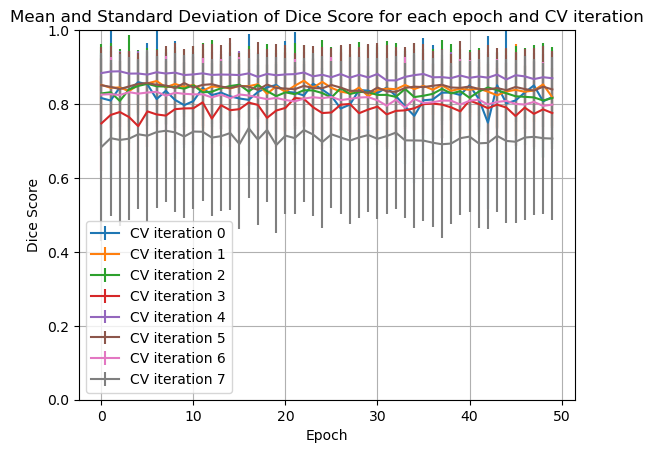

In [12]:
# Mean and std
for cv_iter in mean_std_df['cv_iteration'].unique():
    cv_iter_df = mean_std_df[mean_std_df['cv_iteration'] == cv_iter]
    plt.errorbar(cv_iter_df['epoch'], cv_iter_df['mean'], yerr=cv_iter_df['std'], label=f'CV iteration {cv_iter}')
plt.xlabel('Epoch')
plt.ylabel('Dice Score')
plt.title('Mean and Standard Deviation of Dice Score for each epoch and CV iteration')
plt.legend()
plt.ylim((0, 1.0))
plt.grid(True)
plt.show()

#for cv_iter in mean_std_df['cv_iteration'].unique():
#    cv_iter_df = mean_std_df[mean_std_df['cv_iteration'] == cv_iter]
#    plt.errorbar(cv_iter_df['epoch'], cv_iter_df['mean'], yerr=cv_iter_df['std'], label=f'CV iteration {cv_iter}')
#    plt.xlabel('Epoch')
#    plt.ylabel('Dice Score')
#    plt.title('Mean and Standard Deviation of Dice Score for each epoch and CV iteration')
#    plt.ylim((0, 1.0))
#    plt.legend()
#    plt.grid(True)
#    plt.show()

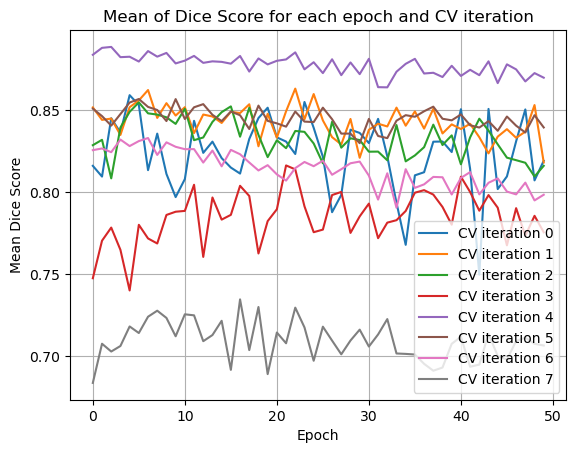

In [13]:
# Mean
for cv_iter in mean_std_df['cv_iteration'].unique():
    cv_iter_df = mean_std_df[mean_std_df['cv_iteration'] == cv_iter]
    plt.plot(cv_iter_df['epoch'], cv_iter_df['mean'], label=f'CV iteration {cv_iter}')

plt.xlabel('Epoch')
plt.ylabel('Mean Dice Score')
plt.title('Mean of Dice Score for each epoch and CV iteration')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
display(mean_std_df.loc[mean_std_df.groupby('cv_iteration')['mean'].idxmax()])

,cv_iteration,epoch,mean,std
4,0,4,0.859163,0.060746
72,1,22,0.863152,0.053276
105,2,5,0.854763,0.097084
171,3,21,0.816338,0.083688
202,4,2,0.888566,0.056012
255,5,5,0.856819,0.086411
306,6,6,0.833048,0.094280
366,7,16,0.734688,0.188866
